<a href="https://colab.research.google.com/github/umesh03B/ma22c048_2023_PL/blob/main/Assignment/Assignment_7/Predator_prey_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports the 'NumPy' library as 'np' for numerical computations.
import numpy as np
#import the 'solve_ivp' function from the 'scipy.integrate' module, which is used to solve initial value problems for ordinary differential equations (ODEs)
from scipy.integrate import solve_ivp
#imports the 'Matplotlib' library, specifically the 'pyplot' module, and assigns it the alias "plt".
import matplotlib.pyplot as plt


**Task:-1**

In [ ]:
def ode_system(t, y, alpha, beta, delta, gamma): #function represents the system of ODEs for given question
    r, x = y
    return np.array([alpha * r - beta * r * x, delta * r * x - gamma * x])

#function returns an array of derivatives representing the rate of change of each state variable with respect to time.

In [ ]:
alpha = 1.1
beta = 0.4
delta = 0.1
gamma = 0.1

In [ ]:
#use the solve_ivp function to solve the given system of ODEs.
solution = solve_ivp(ode_system, [0,70], [5, 2], args=(alpha, beta, delta, gamma),t_eval=np.linspace(0, 70, 1000))

Text(0, 0.5, 'populations')

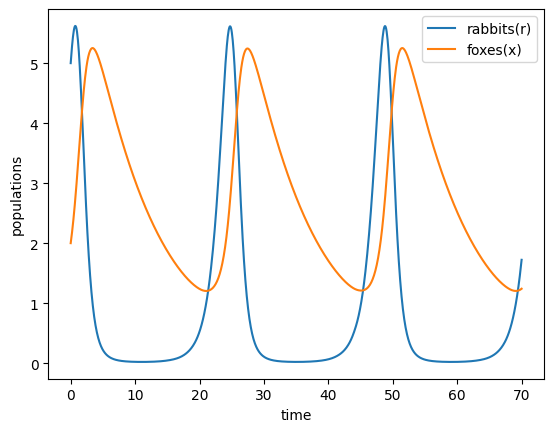

In [ ]:
# create a plot to visualize the results.
fig = plt.figure(); ax = fig.gca() #It creates a figure and an axis.
curves = ax.plot(solution.t, solution.y.T)  #plots the solutions over time for each state variable rabbits(r) and foxes(x).
ax.legend(curves, ['rabbits(r)', 'foxes(x)']);
plt.xlabel('time')
plt.ylabel('populations')

**Task:-2**

In [58]:
def ivpplot(initial_cond=[5,2]):
  """ input is 'initial cond=[r0,x0]'"""
  plt.figure(figsize=(8, 8))
  initial_conditions = initial_cond
  solution = solve_ivp(ode_system, [0,70], initial_conditions, args=(alpha, beta, delta, gamma), t_eval=np.linspace(0, 70, 1000))
  # Plot the phase plot (x vs. r)
  plt.plot(solution.y[1], solution.y[0], label=f'Initial: ({initial_conditions[1]:.2f}, {initial_conditions[0]:.2f})')

  plt.xlabel('Foxes (x)')
  plt.ylabel('Rabbits (r)')
  plt.legend()
  plt.title('Phase Portrait of Rabbit and Fox Population Dynamics')
  plt.grid(True)
  plt.show()

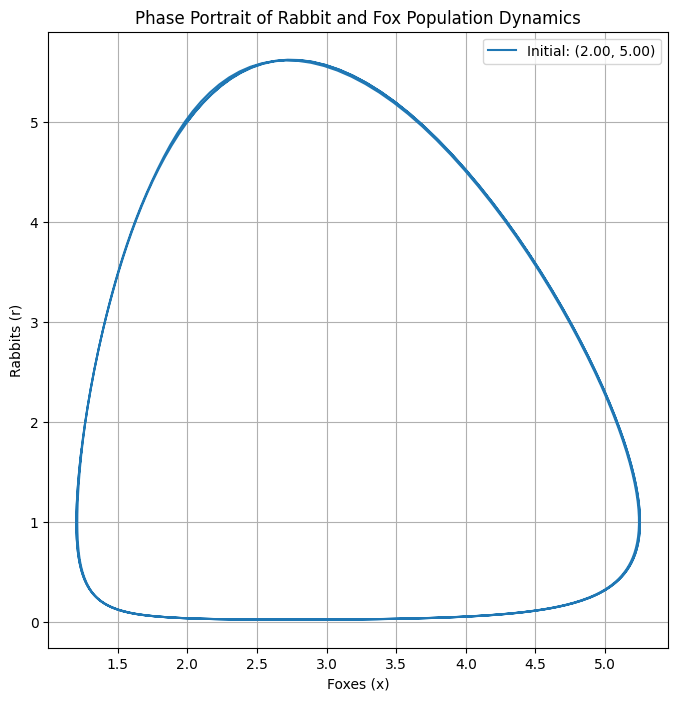

In [59]:
ivpplot()


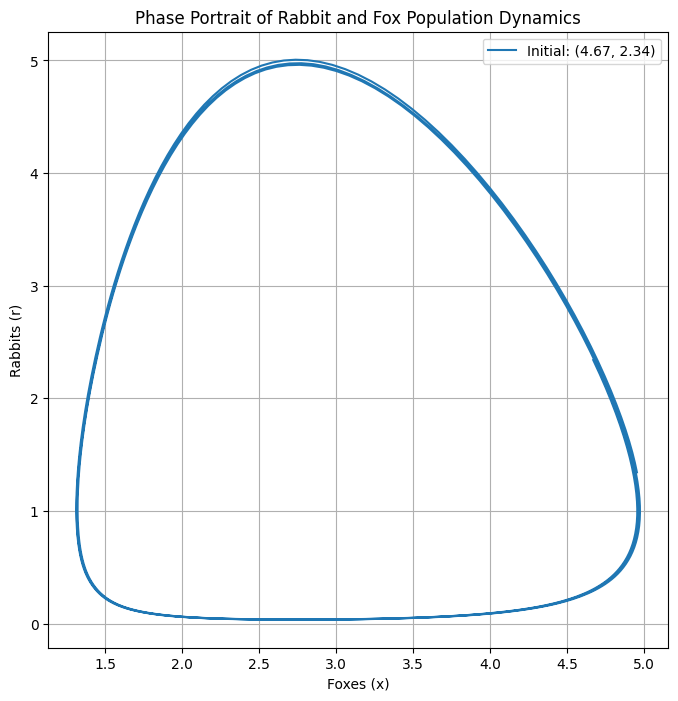

In [60]:
ivpplot([2.34,4.67])  #ivpplot([r0,x0])

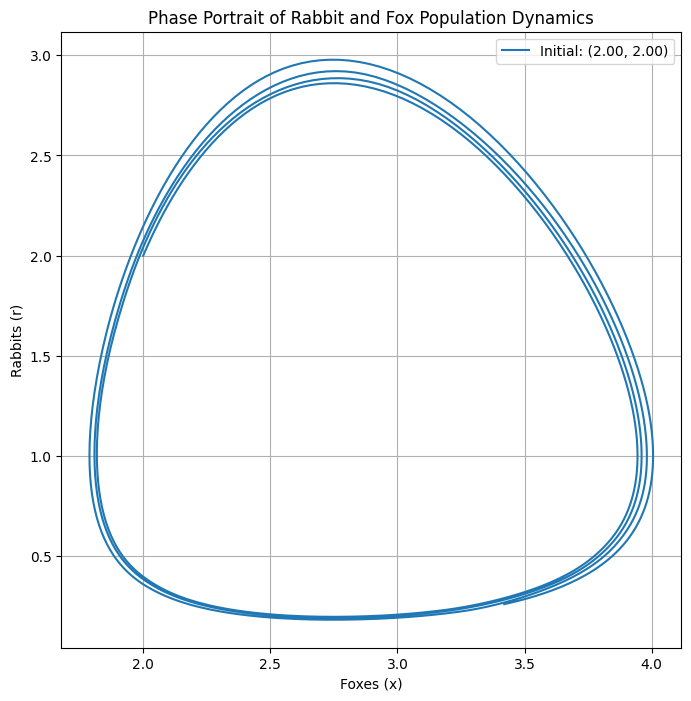

In [64]:
ivpplot([2,2])

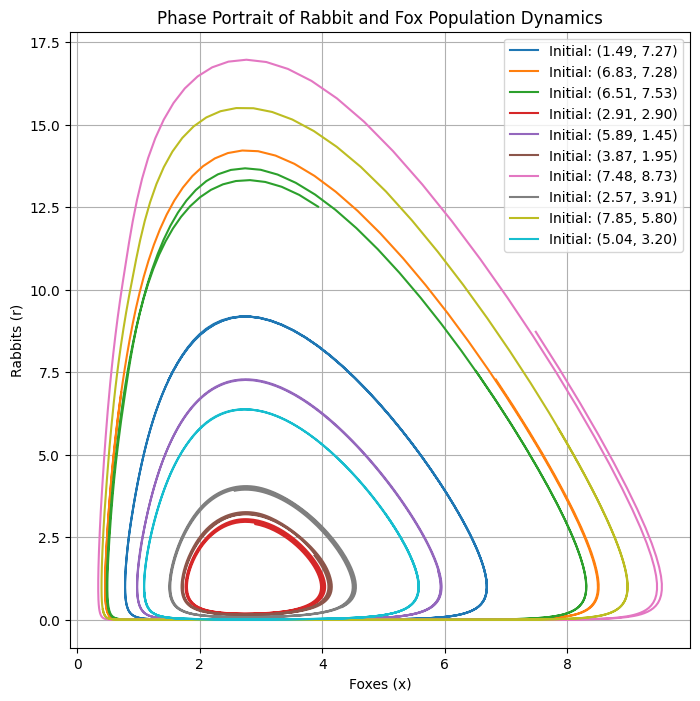

In [61]:
# Create a function to generate random initial conditions

def random_initial_conditions():
    r0 = np.random.uniform(1, 9)
    x0 = np.random.uniform(1, 9)
    return [r0, x0]

# Create the phase portrait
plt.figure(figsize=(8, 8))

for count in range(10): #plot graph between x vs. r for 10 random intial condition
    initial_conditions = random_initial_conditions()
    solution = solve_ivp(ode_system, [0,70], initial_conditions, args=(alpha, beta, delta, gamma), t_eval=np.linspace(0, 70, 1000))

    # Plot the phase plot (x vs. r)
    plt.plot(solution.y[1], solution.y[0], label=f'Initial: ({initial_conditions[1]:.2f}, {initial_conditions[0]:.2f})')

plt.xlabel('Foxes (x)')
plt.ylabel('Rabbits (r)')
plt.legend()
plt.title('Phase Portrait of Rabbit and Fox Population Dynamics')
plt.grid(True)
plt.show()


**Task:-3**

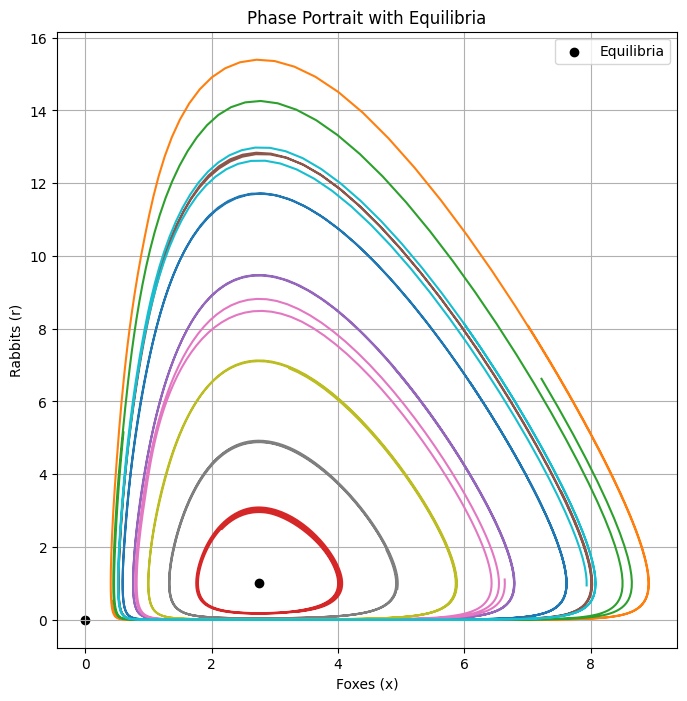

In [53]:
# Calculate the equilibria
#for equilibria dr/dt=αr−βrx=0 this impley r=0 and x= β/α ,
#           and dx/dt=δrx−γx=0 this imply r= δ/γ and x=0
# Equilibrium 1: x = 0,r = 0
# Equilibrium 2: x = alpha / beta, r = gamma / delta
equilibria = [
    [0, alpha / beta],      #x velues
    [0,gamma / delta ]      #r velues
    ]

# Plot the phase portrait
plt.figure(figsize=(8, 8))

for _ in range(10):
    initial_conditions = random_initial_conditions()
    solution = solve_ivp(ode_system, [0,70], initial_conditions, args=(alpha, beta, delta, gamma), t_eval=np.linspace(0, 70, 1000))
    plt.plot(solution.y[1], solution.y[0])

# Plot the equilibria

plt.scatter(equilibria[0], equilibria[1], color='black', marker='o', label='Equilibria')
plt.xlabel('Foxes (x)')
plt.ylabel('Rabbits (r)')
plt.legend()
plt.title('Phase Portrait with Equilibria')
plt.grid(True)
plt.show()
